# **Data preparation**

In [1]:
from Classes.DataPreparator import DataPreparator

buildings_path = "Sample/Data/Buildings lists/Buildings Campus Terrassa.csv"
cadastre_path = "Sample/Data/Cadastre files"
LiDAR_path = "Sample/Data/LiDAR files"
output_path = "Sample/Results/Data Preparation"

dataprep = DataPreparator(buildings_path, cadastre_path, LiDAR_path, output_path)
dataprep.prepare_buildings(source=4326, target=25831)
dataprep.prepare_cadastre(source=4326, target=25831)
dataprep.prepare_LiDAR(las2txtPath="C:/LAStools")

C:\Users\jaasb\AppData\Roaming\Python\Python311\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


# **Solar energy estimation**

TR8


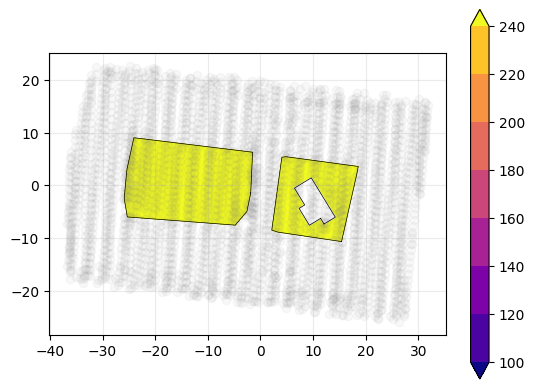

In [3]:
from Classes.SolarEstimator import SolarEstimator
import pandas as pd

LiDAR_info_path = "Sample/Results/Data Preparation/LiDAR/LiDAR_Limits.csv"
cadastre_info_path = "Sample/Results/Data Preparation/Cadastre/Cadastre_Limits.csv"
cadastre_path = "Sample/Data/Cadastre files"
LiDAR_path = "Sample/Data/LiDAR files"
tmyfile = "Sample/Data/TMY_Terrassa-2018.csv"
buildings_info_path = "Sample/Results/Data Preparation/Buildings/Buildings_filtered.csv"

output_path = "Sample/Results"

buildings = pd.read_csv(buildings_info_path) 
buildingsID = buildings.identifier.values

for buildingID in buildingsID[7:8]:
    building = buildings[buildings.identifier == buildingID].reset_index(drop=True)
    print(buildingID)
    
    solarestimator = SolarEstimator(building, output_path, srcLiDAR=25831, square_side=500, temp_path="Sample/Results/_Temp")
    solarestimator.loadData(LiDAR_info_path, cadastre_info_path, LiDAR_path, cadastre_path)
    # solarestimator.segmentLiDAR(square_side=500)   
    # solarestimator.createNeighborhood(LAStoolsPath="C:/LAStools", export3D=True) 

    # solarestimator.identifyPlanes(generateFigures=True, minGlobalPercentage=0.1, minPartialPercentage=0.25, heightThreshold=0.5, distanceThreshold=0.1, 
    #                               ransacIterations=20, stoppingPercentage=0.1, pdfExponent=2, deleteFirst=True)
    # print("\t Plane identification done")

    # solarestimator.processPlanes(generateFigures=True, slidingHole=0.5, minHoleSide = 2.5)
    # print("\t Plane processing done")

    # solarestimator.computeShading(generateFigures=False, Nsamples=25, div=2, bufferSize=1, shadeInside=True)
    # print("\t Shading done")
    solarestimator.simulatePySAM(tmyfile, generateFigures=False)
    # solarestimator.plotEnergyMap()


Since it was thought for all LiDAR data to be in one directory, data has been merged before loading the estimator

In [2]:
import os
import time
from Functions.general_functions import create_output_folder
# Get a list of buildings and select a building for testing

import pandas as pd
buildings_info_path = "Results/Data Preparation/Buildings/Buildings_filtered.csv"
buildings = pd.read_csv(buildings_info_path) 

# This is for peace of mind and ease of debugging
import warnings
warnings.filterwarnings('ignore')

from Classes.SolarEstimator import SolarEstimator

LiDAR_info_path = "Results/Data Preparation/LiDAR/LiDAR_Limits.csv"
cadastre_info_path = "Results/Data Preparation/Cadastre/Cadastre_Limits.csv"
cadastre_path = "Data/v0_1-CZE"
LiDAR_path = "Data/DVDs"
tmyfile = "Data/Zlin_TMY/Zlin_TMY.csv"

output_path = "Results"

FileNotFoundError: [Errno 2] No such file or directory: 'Results/Data Preparation/Buildings/Buildings_filtered.csv'

In [ ]:
buildingsID = ['eP-EAZK-322']

In [ ]:
for buildingID in buildingsID:
    building = buildings[buildings.identifier == buildingID].reset_index(drop=True)
    
    solarestimator = SolarEstimator(building, output_path)
    
    solarestimator.loadData(LiDAR_info_path, cadastre_info_path, LiDAR_path, cadastre_path)

    solarestimator.segmentLiDAR(stl_side=500, partitioned=True)
    solarestimator.generateSTL() 

    solarestimator.identifyPlanes(generateFigures=True, minGlobalPercentage=0.4, minPartialPercentage=0.5, heightThreshold=0.5, distanceThreshold=0.1, 
                                  ransacIterations=20, stoppingPercentage=0.05, pdfExponent=2, deleteFirst=True)
    print("\t Plane identification done")

    solarestimator.processPlanes(generateFigures=True, slidingHole=0.5, minHoleSide = 2.5)
    print("\t Plane processing done")

    solarestimator.computeShading(generateFigures=False, Nsamples=25, div=2, bufferSize=1, shadeInside=True)
    print("\t Shading done")
    solarestimator.simulatePySAM(tmyfile, multipleTilts=False)
    
    del solarestimator

# **Extra code**

## *File management*

In [ ]:
import os
import pandas as pd

directory_path = "Results/Data Preparation/LiDAR/By DVD"

# Get a list of all CSV files in the specified directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Check if there are any CSV files in the directory
if not csv_files:
    print("No CSV files found in the specified directory.")

# Initialize an empty dataframe to store the merged data
merged_df = pd.DataFrame()

# Loop through each CSV file and merge it into the main dataframe
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    # Read the CSV file into a dataframe
    df = pd.read_csv(file_path)
    # Merge the dataframe into the main dataframe
    merged_df = pd.concat([merged_df, df], ignore_index=True)

merged_df
merged_df.to_csv("Results/Data Preparation/LiDAR/LiDAR_Limits.csv", index=False)

In [ ]:
import os
import shutil

source_directory = "Data/DVDs/All DVD"
destination_directory = "Data/DVDs"

# Ensure the destination directory exists; create it if not
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)
    print(f"Created destination directory: '{destination_directory}'")

# Get a list of all files in the source directory
files = [f for f in os.listdir(source_directory) if os.path.isfile(os.path.join(source_directory, f))]

# Move each file to the destination directory
for file in files:
    source_path = os.path.join(source_directory, file)
    destination_path = os.path.join(destination_directory, file)
    shutil.move(source_path, destination_path)
    print(f"Moved: {source_path} -> {destination_path}")

## *If plane identification is split, this helps merging*

In [ ]:
from Functions.general_functions import create_output_folder
import pandas as pd
import os
import shutil

buildingJoin = "eP-EAZK-322"
numberFolders = 8
folderPath = output_path + "/" + buildingJoin

mergedPath = folderPath + "/" + "04 - Plane Processing"
create_output_folder(mergedPath)
create_output_folder(mergedPath + "/01 - Results")

# Plane info
planeList = pd.read_csv(mergedPath +" - còpia/01 - Results/PlaneList_" + buildingJoin + ".csv")

for i in range(numberFolders-1):
    partialPlaneList = pd.read_csv(mergedPath +" - còpia (" + str(i+2) + ")/01 - Results/PlaneList_" + buildingJoin + ".csv")
    planeList = pd.concat([planeList, partialPlaneList])

planeList.to_csv(mergedPath + "/01 - Results/PlaneList_" + buildingJoin + ".csv", index=False)

# Planes points
dir_path = mergedPath +" - còpia/01 - Results/" 
n_planes = len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])
currentN = 0

for i in range(n_planes-1):
    src = dir_path + "/" + buildingJoin + "_" + str(i) + ".csv"
    dst = mergedPath + "/01 - Results/" + buildingJoin + "_" + str(currentN) + ".csv"
    currentN = currentN + 1
    shutil.copy(src, dst)

for i in range(numberFolders-1):
    dir_path = mergedPath + " - còpia (" + str(i+2) + ")/01 - Results/" 
    n_planes = len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])
    for i in range(n_planes-1):
        src = dir_path + "/" + buildingJoin + "_" + str(i) + ".csv"
        dst = mergedPath + "/01 - Results/" + buildingJoin + "_" + str(currentN) + ".csv"
        currentN = currentN + 1
        shutil.copy(src, dst)